In [1]:
%matplotlib inline

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

from sklearn.datasets import load_wine

# Live Demo Regression Models

In [31]:
# Data genenrating - linear function
num_points = 500
x = np.linspace(-3, 3, num_points)
y = 2 * x + 3

#Create noise - loc = 0 is the average value of the noise
y_noise = np.random.normal(loc = 0, scale = 1, size = num_points)
y += y_noise

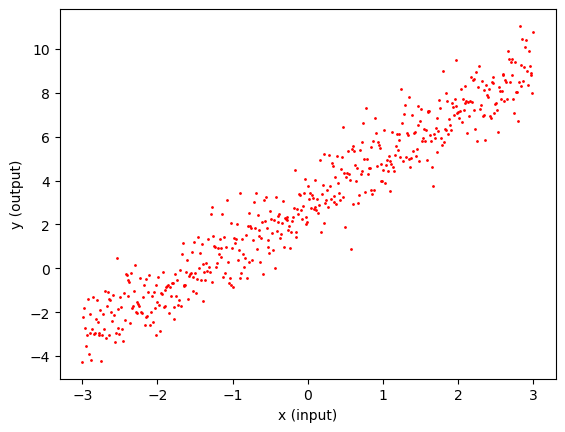

In [32]:
plt.scatter(x, y, c = 'r', s = 1)
plt.xlabel('x (input)')
plt.ylabel('y (output)')

plt.show()

In [33]:
# Create data frame
data = pd.DataFrame({'x': x, 'y':y})

In [34]:
data = data.sample(len(data))
data.to_csv('data_csv', index = None)

In [35]:
pd.read_csv('data_csv')

,x,y
0,0.426854,3.126783
1,2.531062,6.228719
2,0.066132,3.201748
3,0.919840,4.676088
4,-1.460922,1.420274
...,...,...
495,0.294589,3.755453
496,2.603206,8.834101
497,-0.751503,1.837753
498,-2.963928,-2.718231


In [38]:
# Start with assumption
# y = a * x + b
x = data.x.values
y = data.y.values

In [60]:
# Mean square error
def mse(y, y_model):
    return ((y - y_model) ** 2).mean()

In [67]:
def plot_model(x, y, a, b):
    y_model = a * x + b
    model_mse = mse(y, y_model)
    plt.scatter(x, y)
    plt.plot(x, y_model, c = 'r', label = f' y = {a}x + {b}; mse: {model_mse:.2f}')
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y model')
    plt.show()

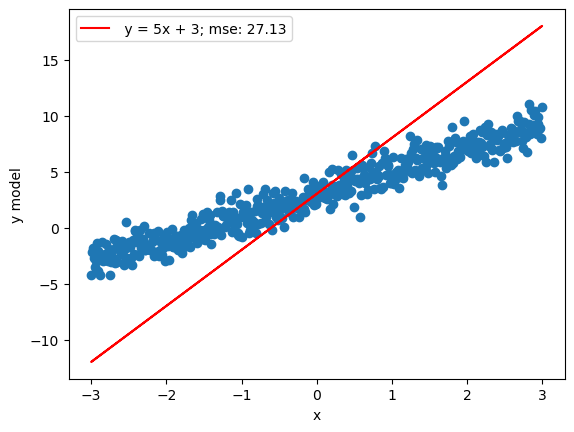

In [68]:
plot_model(x, y, 5, 3)

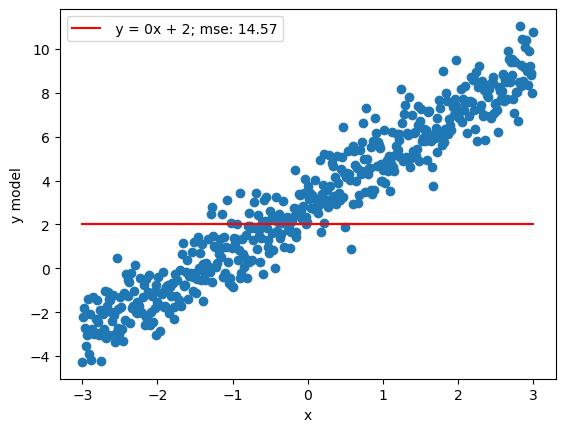

In [69]:
plot_model(x, y, 0, 2)

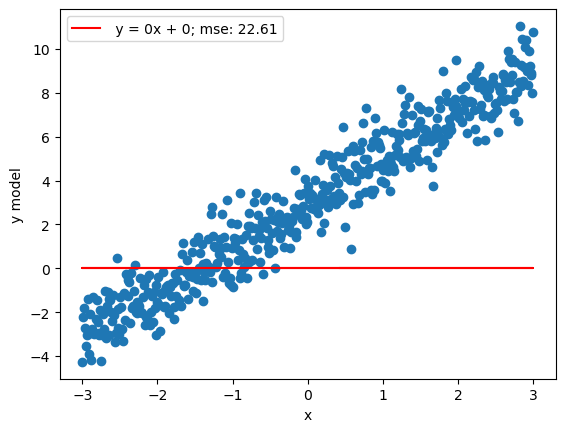

In [70]:
plot_model(x, y, 0, 0)

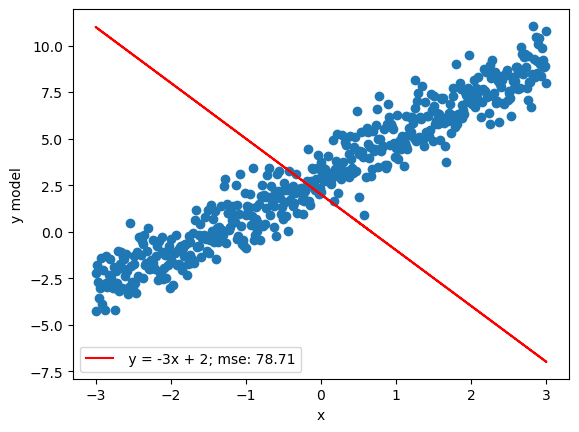

In [72]:
plot_model(x, y, -3, 2)

In [73]:
n_trials = 100
random_a = np.random.uniform(-5, 5, n_trials)
random_b = np.random.uniform(-5, 5, n_trials)

In [82]:
# Estimate the original func
min_mse, best_a, best_b = 1e50, 0,0 
for a in random_a:
    for b in random_b:
        y_model = a * x + b
        curr_mse = mse(y, y_model)
        if curr_mse < min_mse:
            best_a, best_b = a, b
            min_mse = curr_mse
        
print(best_a, best_b, min_mse)

2.3044591840610735 2.991751326365809 1.0966646932699022


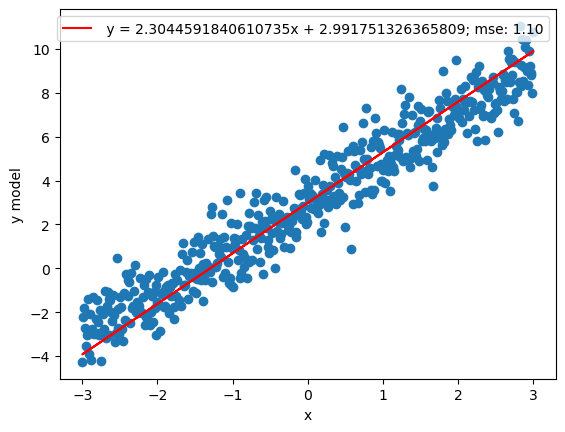

In [83]:
plot_model(x, y, best_a, best_b)

In [116]:
a, b = 5, 18
alpha = 0.01

a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
b_gradient = -2 / len(y) * np.sum(y - (a * x + b))

In [117]:
y_tilde = a * x + b
mse(y, y_tilde)

251.81151108911294

In [118]:
[a_gradient, b_gradient]

[17.77524120100632, 29.979092374190902]

In [119]:
new_a = a - alpha * a_gradient
new_b = b - alpha * b_gradient

In [120]:
y_tilde = new_a * x + new_b
mse(y, y_tilde)

239.84950156451634

In [121]:
new_a = new_a - alpha * a_gradient
new_b = new_b - alpha *  b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

228.257576577411

In [122]:
new_a = new_a - alpha * a_gradient
new_b = new_b - alpha *  b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

217.03573612779692

In [123]:
for i in range(10):
    new_a = new_a - alpha * a_gradient
    new_b = new_b - alpha *  b_gradient
    y_tilde = new_a * x + new_b
    print(mse(y, y_tilde))

206.18398021567418
195.70230884104268
185.59072200390247
175.84921970425356
166.47780194209594
157.47646871742955
148.84522003025452
140.58405588057073
132.6929762683782
125.17198119367697


In [126]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - learning_rate * a_gradient
    new_b = b - learning_rate *  b_gradient
    return (new_a, new_b)

In [136]:
model_a, model_b = -10, 20 # can be anywhere
alpha = 0.01 # learning rate
all_errors = []
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x, y, model_a, model_b, alpha)
    model_y = model_a * x + model_b
    error = mse(y, model_y)
    all_errors.append(error)
    
print('Final line {} * x + {}'.format(model_a, model_b))

Final line 2.0492863076173764 * x + 3.0104538409255444


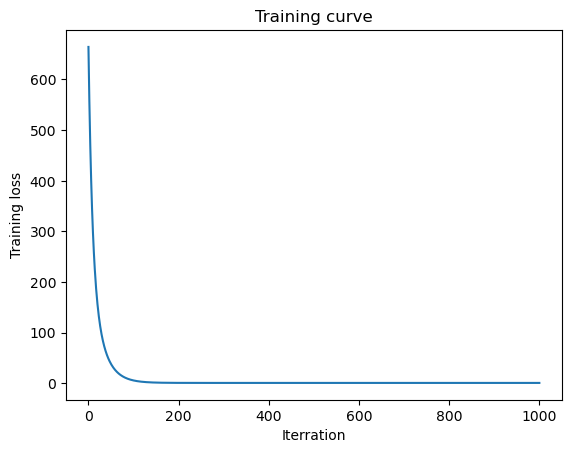

In [139]:
plt.plot(all_errors)
plt.title('Training curve')
plt.xlabel('Iterration')
plt.ylabel('Training loss')
plt.show()

In [140]:
model_a, model_b

(2.0492863076173764, 3.0104538409255444)

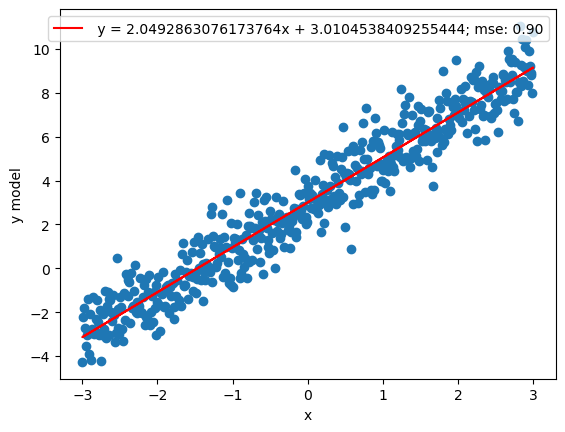

In [141]:
plot_model(x, y, model_a, model_b)

### Model evaluations

In [146]:
# Root mean square error - мeasure of the typical difference between a data point and its prediction
model_y = model_a * x + model_b
error = mse(y, model_y)
error, np.sqrt(error)

(0.9001923954386334, 0.9487846939314701)

In [149]:
# The easiest way is to use sklearn LinearRegression
linear_regression = LinearRegression()

In [150]:
# Reshape corrects the values of x and arranges them in a single column, as required by the rows
linear_regression.fit(x.reshape(-1, 1), y)

LinearRegression()

In [152]:
# The results from linear regression sklearn func
linear_regression.coef_, linear_regression.intercept_

(array([2.04928631]), 3.010453812904549)

In [154]:
predict = linear_regression.predict(x.reshape(-1, 1))

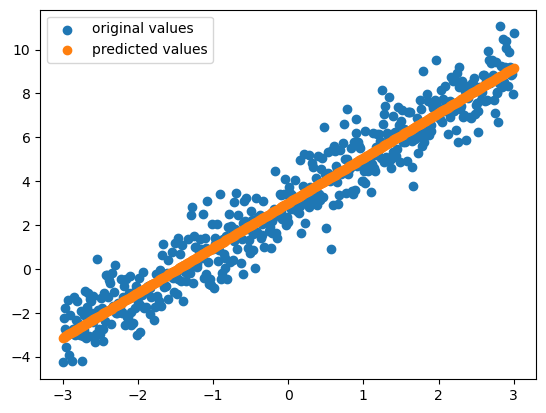

In [157]:
plt.scatter(x, y, label = 'original values')
plt.scatter(x, predict, label = 'predicted values')
plt.legend()
plt.show()

In [158]:
linear_regression.score(x.reshape(-1, 1), y)

0.9335622508289343

In [161]:
r2_score(y, predict)

0.9335622508289343

In [163]:
mean_squared_error(y, predict)

0.9001923954386325

In [165]:
np.sqrt(mean_squared_error(y, predict))

0.9487846939314696

In [166]:
mean_absolute_error(y, predict)

0.7485471933724258

In [170]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [172]:
wine = load_wine()
wine_data = wine['data']
wine_labels = wine['target']

In [174]:
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [176]:
wine_data.shape

(178, 13)

In [187]:
wine_data = pd.DataFrame(wine_data)

In [188]:
wine_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [181]:
with open('data/wine_features.txt') as file:
    features = file.read()

In [183]:
features = features.split('\n')

In [185]:
features = [line.strip() for line in features]

In [186]:
features

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [193]:
wine_data.columns = features

In [194]:
wine_data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [196]:
wine_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [198]:
# Start logistic regression to wine dataset
logistic_regression = LogisticRegression()

In [199]:
logistic_regression.fit(wine_data, wine_labels)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [201]:
logistic_predictions  = logistic_regression.predict(wine_data)

In [202]:
logistic_predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [204]:
logistic_predictions == wine_labels

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [206]:
#Accuracy measurment
(logistic_predictions == wine_labels).sum()/ len(wine_labels) 

0.9662921348314607

In [208]:
accuracy_score(wine_labels, logistic_predictions)

0.9662921348314607

In [ ]:
# Split dataset 

In [211]:
wine_data_train, wine_data_test, wine_labels_train, wine_labels_test = train_test_split(wine_data, wine_labels)

In [213]:
len(wine_data), len(wine_data_train), len(wine_data_test)

(178, 133, 45)

In [222]:
logistic_regression_new = LogisticRegression(max_iter=500)

In [223]:
logistic_regression_new.fit(wine_data_train, wine_labels_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [224]:
logistic_regression_new.score(wine_data_train, wine_labels_train)

0.9924812030075187

In [225]:
logistic_regression_new.score(wine_data_test, wine_labels_test)

0.9333333333333333